<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Clustering </H1>

<H3> INF-479 Reconocimiento de patrones en Minería de Datos (Posgrado) </H3>
<H3> Autores: Francisco Andrades | Lucas Díaz</H3>

Lenguaje: Python

Temas:

    - Kmeans, DBSCAN, Hierarchical Agglomerative Clustering (HAC)
    - Image Segmentation
    - Community Detection
<hr style="height:2px;border:none"/>

# Parte 1

En esta primera parte de la tarea se estudiarán los algoritmos de Clustering K-means, Clustering jerárquico aglomerativo y DBSCAN, aplicados a 3 datasets de tipo vectorial. El objetivo es contrastar estos 3 algoritmos y determinar ventajas y desventajas frente a cada caso de estudio. Además, analizar el impacto de la elección de parámetros y medidas de proximidad. 

## 1.1 Dataset

Para esta primera parte se cuenta con 3 archivos:

1. <b>Spiral.txt</b> : $N=312, D=2$
2. <b>R15.txt</b> : $N=600, D=2$
3. <b>cute-t2-4k.txt</b> : $ N=4200, D=2$

Cada uno correspondiente a un dataset vectorial bidimensional, donde cada fila del archivo tiene el formato: $x_1$\t$x_2$. Siendo $x_1$ y $x_2$ los atributos de cada dato $X^{(i)}$ $\in \mathbf{R} ^{2}$ . 
Los datasets tienen una cantidad de puntos de 312, 600 y 4200 respectivamente.

In [11]:
#Librerías 
import sklearn.cluster as skl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import scipy
from ipywidgets import interact, interactive, fixed, interact_manual
#Librerías
import cv2
path = ""

In [ ]:
#SI NO FUNCIONA EL INTERACT CORRER ESTO Y REINICIAR LA SESION3
#!pip install ipywidgets==7

## 1.2 K-Means

Responder: 

    >a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 
   
    >> En el dataset R15.txt con K = 16. Este desempeño coincide tanto en el coeficiente de Silhouette como en el análisis visual hecho por nosotros. La razón por la cual K-means funciona mejor en este dataset que en el resto es que la forma de los clusters es propicia para el algoritmo (pequeños grupos isomorfos).
    
    >b. ¿Qué valor de k (cantidad de centroides) entrega un mejor resultado para cada uno de los datasets? ¿Qué método se podría utilizar para determinar un valor óptimo para k? 
    
    >> Para el dataset spiral.txt K = 19. Para el dataset R15.txt K = 16. Para el dataset cure-t2-4k K=9. Para encontrar el valor óptimo de K puede analizarse el coeficinete de silhouette o emplear el método del elbow.
    
    
<i> Hint: Para la pregunta 3.b, se sugiere utilizar la función interact de la librería [ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).</i>

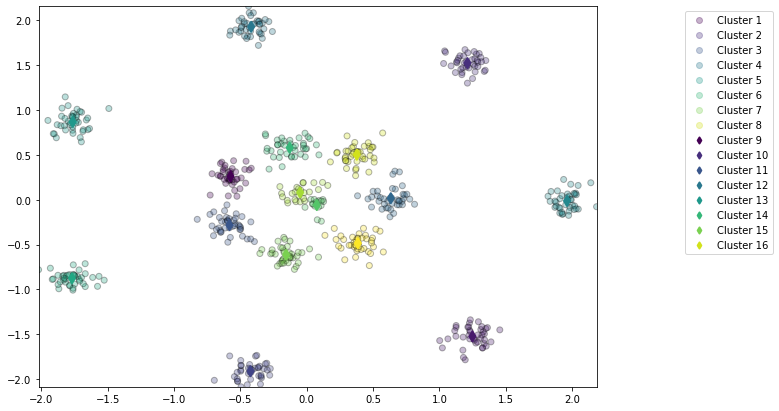

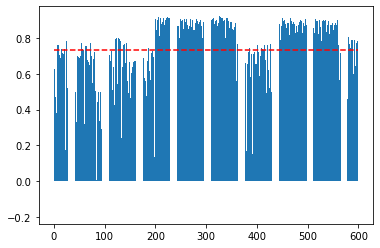

Average Silhouette Score: 0.7346291226884643


In [19]:
#Implementación
from sklearn.metrics import silhouette_samples
def kmeans_(file,K,plot_siluete=False):
    X = data_array(file)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    kmeans = skl.KMeans(n_clusters = K)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroides = kmeans.cluster_centers_
    
    class_labels = ["Cluster " + str(i+1) for i in range(K)]
    for i in range(K):
        class_labels.append("Centroide " + str(i+1))
    
    centroides_labels = np.array(range(K))
    

    x_min, x_max = X[:, 0].min() , X[:, 0].max() 
    y_min, y_max = X[:, 1].min() , X[:, 1].max() 
   
    
    plt.figure(figsize = (10,7))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels,alpha = 0.3,edgecolor='black')
    scatter2 = plt.scatter(centroides[:,0], centroides[:, 1],s=50, c=centroides_labels, alpha = 1,marker='d',lw=2)
    handles = scatter.legend_elements()[0] + scatter2.legend_elements()[0]
    plt.legend(handles=handles, labels=class_labels,bbox_to_anchor=(1.15, 1))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
    
    siluete = silhouette_samples(X, labels)
    mean = siluete.mean()
    if plot_siluete:
        fig, ax = plt.subplots()
        arr1inds = labels.argsort()
        labels = labels[arr1inds[::-1]]
        siluete = siluete[arr1inds[::-1]]
        index = np.arange(labels.shape[0])
        ax.bar(index,siluete)
        ax.plot([0., index[-1]], [mean, mean], "k--",color='red')
        plt.show()
    print("Average Silhouette Score: {}".format(mean))
    
    
#interact(kmeans_,file=[path+"Spiral.txt",path+"R15.txt",path+"cure-t2-4k.txt"],K=(2,20),plot_siluete=False)
#plt.show()
kmeans_(path+"R15.txt",16,plot_siluete=True)

## 1.3 DBSCAN

Responder: 

    > a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué?
    
    >> En el dataset spiral.txt tiene una performance de nivel superior(eps=0.5; minPts = 6). Sin embargo, se comporta bien en todos los datasets. DBSCAN es muy flexible, siendo capaz de identificar datos con formas muy diferentes. En el dataset cure-t2-4k, es capaz de captar el ruido(eps = 0.1; minPts = 9). 
    
    > b. ¿Qué parámetros de Pts y minPts entregan el mejor resultado para cada gráfico? ¿Qué estrategia podríamos utilizar para escoger estos parámetros?  
    
    >> Spiral.txt: eps = 0.5; minPts = 6.
    
    R15.txt: eps = 0.5; minPts = 6.
    
    cure-t2-4k.txt: eps=0.1; minPts = 9.
    
    Los parámetros fueron escogidos mediante análisis visual.
    
<i> Hint: Para la pregunta 3.b, se sugiere utilizar la función interact de la librería [ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).</i>

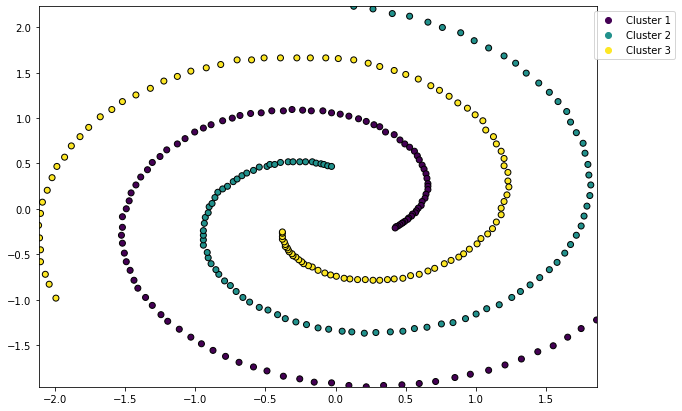

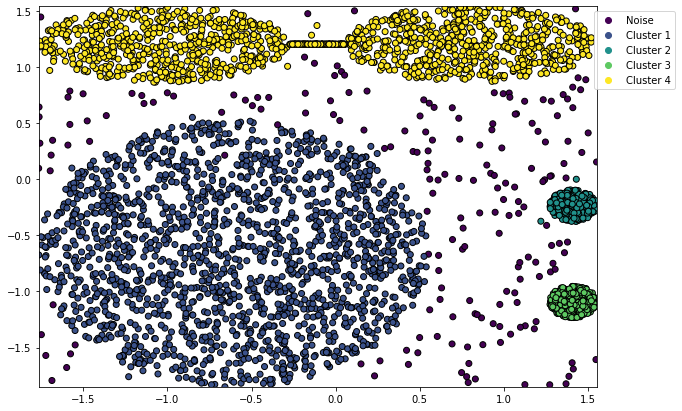

In [21]:
def dbscan_(file,eps,minPts):
    X = data_array(file)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    
    dbscan = skl.DBSCAN(eps = eps, min_samples = minPts)

    labels = dbscan.fit_predict(X)
    unique_labels = np.unique(labels)
    K= unique_labels.shape[0]
    if unique_labels[0] == -1:
        class_aux = ["Noise"]
        class_labels = ["Cluster " + str(i+1) for i in range(K-1)]
        class_labels = class_aux + class_labels
    else:
        class_labels = ["Cluster " + str(i+1) for i in range(K)]




    x_min, x_max = X[:, 0].min() , X[:, 0].max() 
    y_min, y_max = X[:, 1].min() , X[:, 1].max() 
   
    plt.figure(figsize = (10,7))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels,alpha = 1,edgecolor='black')
    handles = scatter.legend_elements()[0] 
    plt.legend(handles=handles, labels=class_labels,bbox_to_anchor=(1.15, 1))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
    
#interact(dbscan_,file=[path+"Spiral.txt",path+"R15.txt",path+"cure-t2-4k.txt"],eps=(0.1,1),minPts=(1,10),plot_siluete=False)
#plt.show()
dbscan_(path+"spiral.txt",0.5,6)
dbscan_(path+"cure-t2-4k.txt",0.1,9)

## 1.4 Hierarchical Agglomerative Clustering

Responder: 

    > a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué?
    >> En el dataset spiral.txt (single link). Porque HAC permite identificar clusters de acuerdo a la proximidad de una forma jerárquica, produciendo que cada espiral sea un solo clusters, debido a la continua cercanía de los puntos.
    
    > b. ¿En cuál o cuáles datasets se obtiene un mejor resultado para HAC utilizando single-link? ¿Por qué?  
    >> En el dataset spiral.txt. Debido al mismo motivo explicado anteriormente.

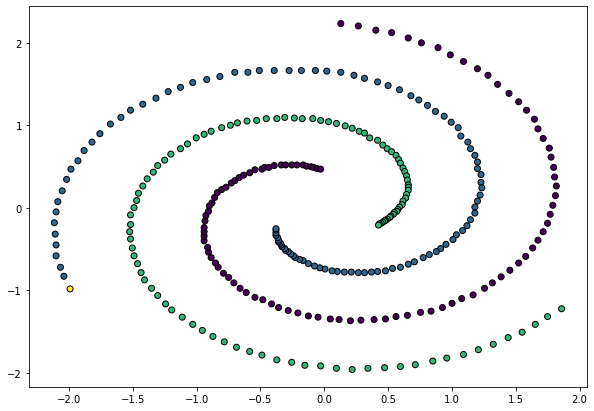

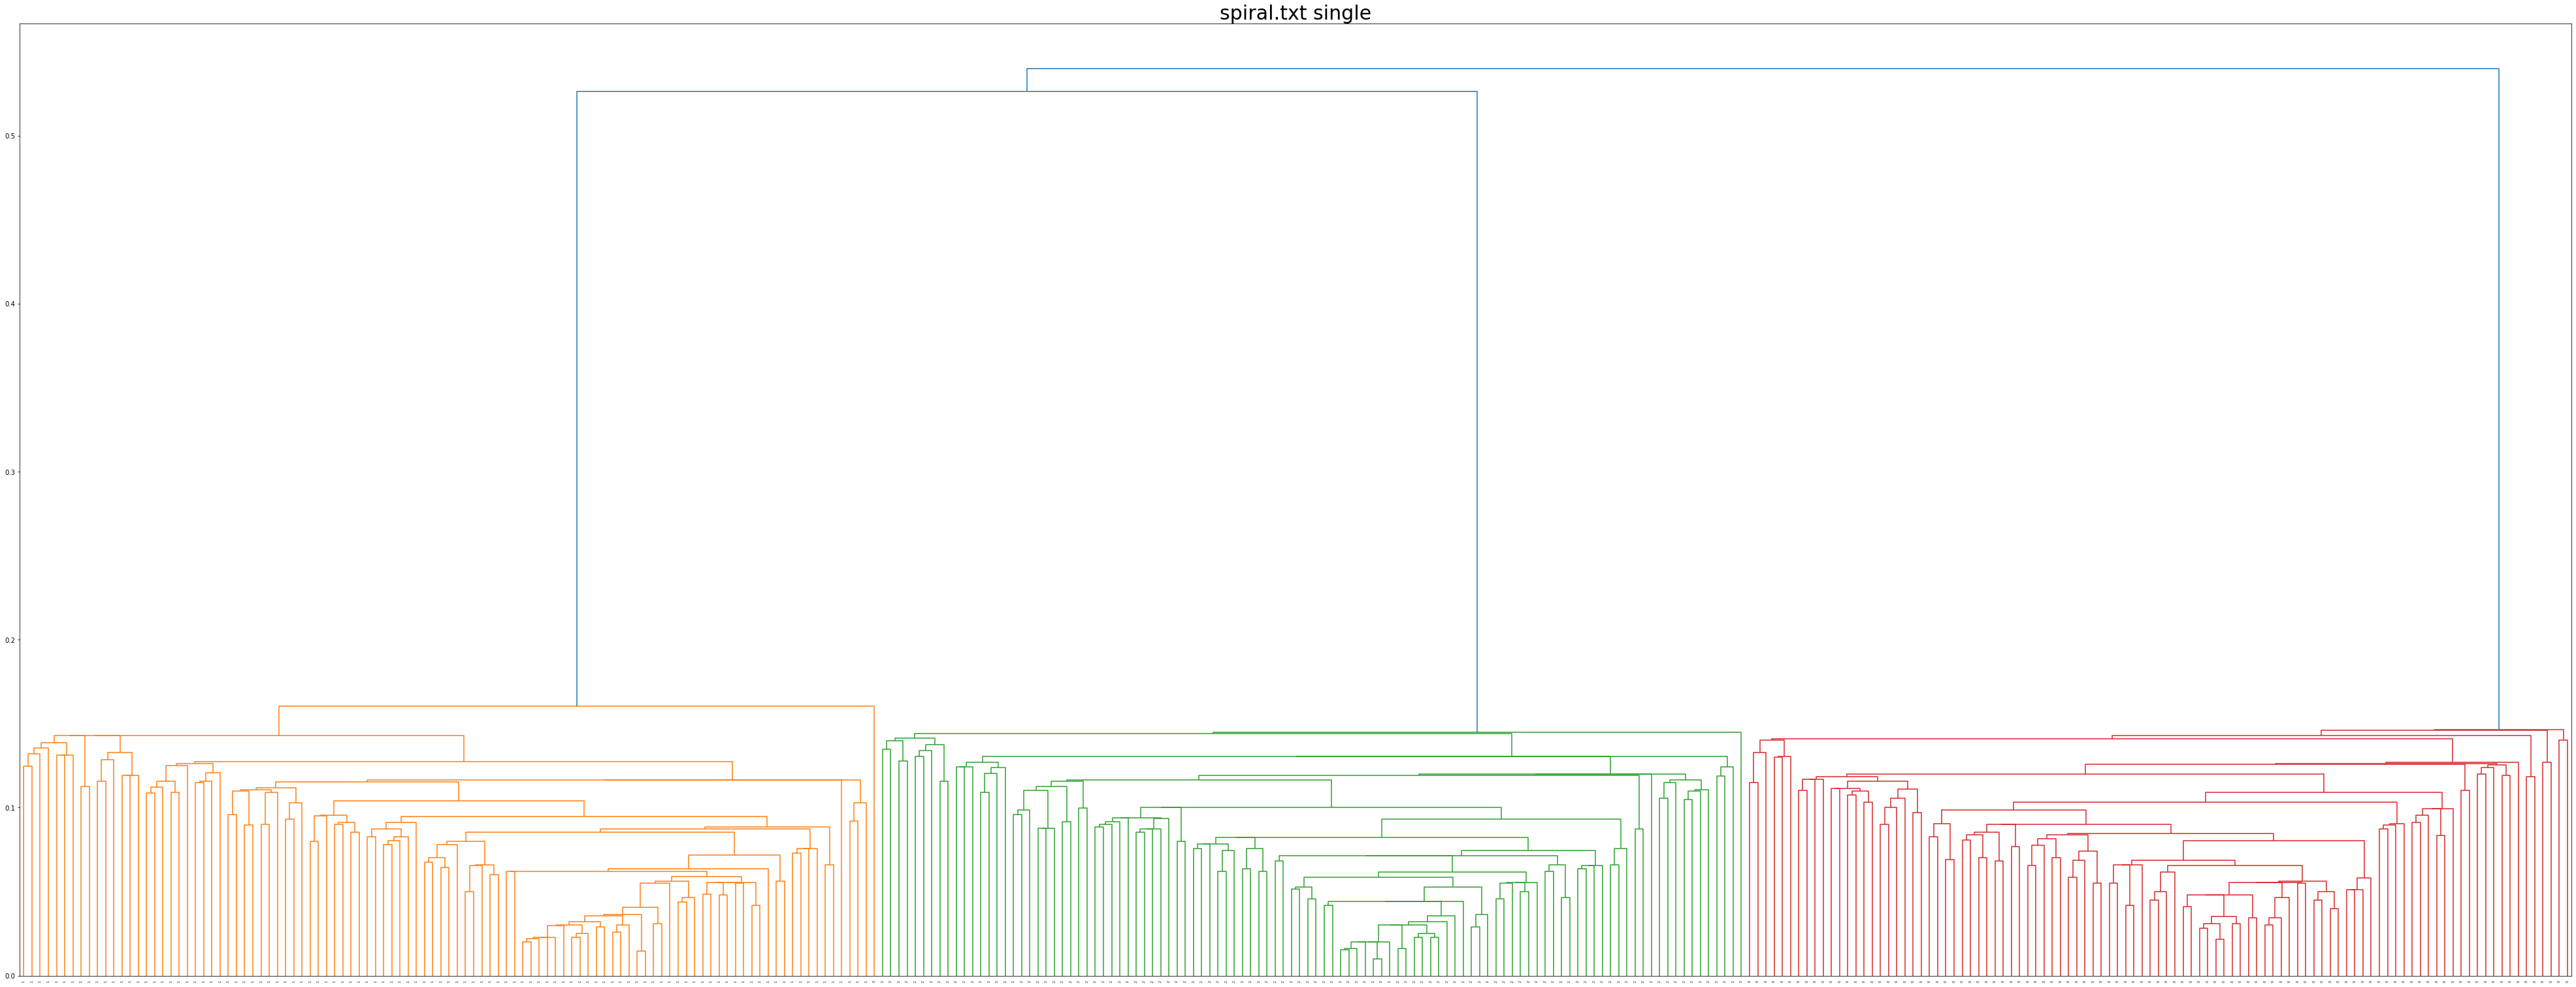

In [22]:
def hac_1(file, linked, dendrograma=False):
    
    if file == path+'Spiral.txt':
        n_clust = 3
    elif file == path+'R15.txt':
        n_clust = 8
    else:
        n_clust = 4 #'cure-t2-4k.txt'
        
    X = data_array(file)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    hac = skl.AgglomerativeClustering(n_clusters=n_clust, affinity='euclidean', linkage=linked).fit(X)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:,0], X[:,1], c = hac.labels_,edgecolor='black')
    plt.show()
    if dendrograma:
        criterio_linked = scipy.cluster.hierarchy.linkage(X, linked)
    
        fig = plt.figure(figsize=(70, 30))
        ax = fig.add_subplot(111) # add a subplot to the new figure
        fig.subplots_adjust(top=0.80) # adjust the placing of subplot, adjust top, bottom, left and right spacing  
        ax.set_title("{} {}".format(file, linked), fontsize= 30) # title of plot
        
        scipy.cluster.hierarchy.dendrogram(criterio_linked, 
                                           orientation='top', 
                                           labels = hac.labels_, 
                                           distance_sort = 'descending',
                                           show_leaf_counts = False)
        plt.show()
        
#interact(hac_1, 
#         file = [path+"Spiral.txt",path+"R15.txt",path+"cure-t2-4k.txt"], 
#         linked = ["single", "complete"], 
#         dendrograma=False)
#plt.show()
hac_1(path+"spiral.txt","single",True)

## 1.5 Conclusiones  


Para el dataset spiral.txt, tanto DBSCAN como HAC fueron los mejores en el clustering. Para el dataset R15.txt, K-means tuvo el mejor comportamiento. Para el dataset cure-t2-4k.txt, DBSCAN superó al resto de los algoritmos, siendo capaz de discriminar el ruido.

**Ventajas y desventajas por algoritmo:**

    *K-means*: se comporta bien cuando los datos tienen formas regulares y claras. La desventaja radica en no determina automáticamente el número de clusters, además de comportarse mal cuando la forma del dataset no es regular.\
    *DBSCAN*: es flexible y permite detectar ruido, permitiendo detectar clusters regulares e irregulares. Una desventaja es que deben sintonizarse dos hiperparámetros, además de funcionar mal cuando existen zonas con densidades muy diversas.\
    *HAC*: es más flexible en cuanto a las formas de los clusters, no requiere sintonizar parámetros y permite identificar relaciones jerárquicas entre los datos. Una limitante de HAC es que puede no converger al óptimo global, quedándose estancado en un óptimo local. Tampoco es capaz de indentificar ruido.

Para spiral.txt, K-means entregó el peor resultado, ya que los datos no tienen formas regulares, condición para que funcione correctamente.\
Para R15.txt, ni DBSCAN ni HAC fueron capaces de igualar el rendimiento de K-means. Ninguno fue capaz de identificar los diferentes clusters que se encontraban en el centro\
Para cure-t2-4k.txt, ni K-means ni HAC fueron capaces de igualar el rendimiento de DBSCAN, ya que este último fue el único capaz de identificar el ruido.

---
# Parte 2 - Image Segmentation

La segmentación de imagen (Image Segmentation) es un problema de visión computacional que apunta al particionamiento de una imagen en diferentes áreas de pixeles que tienen atributos similares. Eso se realiza generando una máscara sobre la imagen que asigna una etiqueta a cada pixel y donde pixeles con la misma etiqueta forman parte de la misma región. 

La segmentación de imágenes se utiliza principalmente para detectar objetos o bordes en imágenes, y tiene diversas aplicaciones como lo son la identificación de células cancerígenas en exámenes médicos, identificación de cuerpos de interés en imágenes satelitales, entre otras. 


<img src="https://dl.acm.org/cms/attachment/8542befb-3134-46f0-a5ad-1534c63188b4/csur5204-73-f01.jpg" title="Title text" width="80%" />
<center> <i> Figura 1. Ejemplo de Image Segmentation. </i> </center>


## Preguntas

 
1. Realice Image Segmentation utilizando el algoritmo K-Means para la imagen1.jpg y la imagen2.jpg
2. Muestre gráficamente el resultado de la segmentación en ambas imágenes donde se distingan claramente los clusters obtenidos. Concluya.

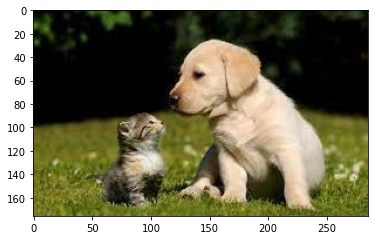

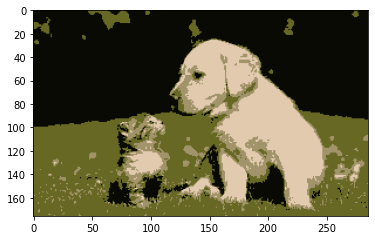

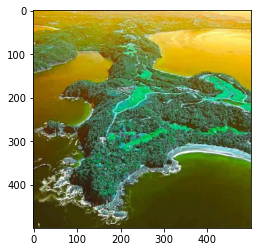

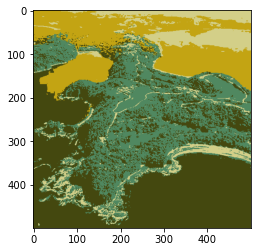

In [26]:
def pregunta_2(imagen,n_clusters):
    image_path = path+imagen
    image = cv2.imread(image_path) # # using 0 to read image in grayscale mode
    shape = image.shape
    image_original = image
    image = image.reshape(shape[0]*shape[1],3)
    image = image.astype('float32')

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = n_clusters
    ret,label,center=cv2.kmeans(image,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((shape))
    plt.imshow(image_original)
    plt.show()
    plt.imshow(res2)
    plt.show()

#interact(pregunta_2,imagen=['imagen1.jpg','imagen2.jpg'],n_clusters=(2,10))
#plt.show()
pregunta_2("imagen1.jpg",n_clusters = 4)
pregunta_2("imagen2.jpg",n_clusters = 4)

Se puede apreciar que se clusterizan los pixeles de acuerdo a su similitud en color. Pixeles en lugares lejanos pueden ser considerados bajo el mismo cluster. Sería interesante utilizar un método que considere, además de la similitud en color, la distancia geométrica dentro de la imagen.

Para la imagen 1, 4 clusters parecen hacer un buen trabajo para diferenciar los elementos relevantes (gato,perro,fondo), sin embargo el algoritmo se confunde un poco entre el gato y el pasto.

Para la imagen 2, el algoritmo no logra agrupar la totalidad de la masa de agua en un sólo cluster (Se confunde entre el agua de la zona inferior y el agua de la zona superior). Esta limitación surge debido a la diferencia de color ocasionada por la iluminación.

---
# Parte 3 - Community Detection

En la última parte de la tarea, se estudiará el algoritmo Louvain para Detección de Comunidades aplicado al dataset de grafos "Enron email network". 

## Dataset

* Para esta parte de la tarea, trabajaremos con el dataset de grafos <b>"Enron email network"</b>, el cual contiene las interacciones vía correo electrónico de 36692 trabajadores y trabajadoras de la compañía energética estadounidense "Enron". 
* Este dataset se encuentra contenido en el archivo adjunto "Email-Enron.txt" en el cual se enumeran todos los pares de correos electrónicos de dicha empresa entre los cuales se ha enviado al menos un mensaje. 
* El archivo contiene 183831 líneas, las cuales corresponden al total de aristas no dirigidas del grafo y su formato por línea es:

<blockquote> #Nodo_origen \t #Nodo_destino. </blockquote>

## Community Detection

El problema de <b>Detección de Comunidades</b> es un problema fundamental en análisis de redes y consiste en buscar grupos de nodos que tengan ciertas propiedades en común y que, por tanto, sean más similares entre si que con otros nodos. A estos conjuntos de nodos les llamamos "comunidades". 

Si modelamos las interacciones de un conjunto de personas en un determinado contexto como un grafo, tendríamos que los nodos corresponderían a las personas y las aristas a las interacciones entre ellas. En este contexto, podemos definir a una comunidad como un subconjunto de nodos del grafo que están densamente conectados entre sí y débilmente conectados a los nodos en otras comunidades dentro del grafo. 

Para esto, podemos utilizar el algoritmo Louvain de Detección de comunidades para realizar Clustering en grafos, en el cual los clusters obtenidos corresponderán a las comunidades dentro del grafo. 


## Algoritmo Louvain 

Es un algoritmo para detección de comunidades en redes complejas o grafos, ideado en 2008 por investigadores de la Universidad Católica de Bélgica, cuyo objetivo es maximizar la modularidad de un grafo. 

¿Qué es la modularidad? Es una medida que compara la cantidad de aristas dentro y fuera de la comunidad, la cual está expresada por la siguiente ecuación para grafos con peso:  

\begin{equation*}
    Q = \dfrac{1}{2m} \sum_{i,j} [ A_{ij} - \dfrac{k_{i}k_{j}}{2m}] \delta (c_{i}, c_{j})
\end{equation*}

Donde:

* $A_{ij}$ es el peso de la arista entre $i$ y $j$
* $k_{i}$, $k_{j}$ son la suma de los pesos de las aristas conectadas a los nodos i y j respectivamente
* $m$ es la suma de todos los pesos de las aristas en el grafo
* $\delta$ es la función delta de Kronecker. La cual es 1 si $x = y$ y 0 en el caso contrario. 
* $Q \in [-1,1]$


Para optimizar la modularidad, el algoritmo realiza los siguientes pasos: 
1. Inicialmente, cada nodo constituye una comunidad. 
2. Luego, se selecciona un nodo al azar y se evalúa si la partición tiene mejor modularidad al asignar dicho nodo a la comunidad de alguno de sus vecinos. 
3. Si la modularidad de la partición actual es mejor, el nodo se queda en su comunidad. 
4. Si la modularidad de la partición al asignar el nodo a uno de sus vecinos es mejor, se asigna dicho nodo a la comunidad de dicho vecino. 
5. Se sigue seleccionando nodos al azar y realizando los pasos anteriores, hasta que las particiones obtenidas en dos pasos seguidos sean iguales. 


> Para esta implementación, se debe instalar la librería [Python-Louvain](https://github.com/taynaud/python-louvain) (<i>leer documentación y pasos de instalación</i>). Además, utilice la librería networkx para elaborar el grafo. 

In [27]:
#Librerías
import community as community_louvain
import networkx as nx

## Preguntas

1. Cargar el dataset en un grafo de networkx.
2. Aplicar el algoritmo Louvain para Clustering en el grafo. 
3. Generar un nuevo archivo "out.txt" con los nodos etiquetados. 
4. Mostrar gráficamente 5 comunidades. No importa si estas comunidades están conectadas las unas a las otras.  

In [28]:
#Implementación
G1 = nx.read_edgelist(path+'Email-Enron.txt')

In [31]:
partition = community_louvain.best_partition(G1,randomize=True)

# descomentar esto para generar archivo out.txt
#with open('out.txt', 'w') as f:
#    print(partition, file=f)
print("Modularidad: ",community_louvain.modularity(partition,G1))

Modularidad:  0.6197794731353966


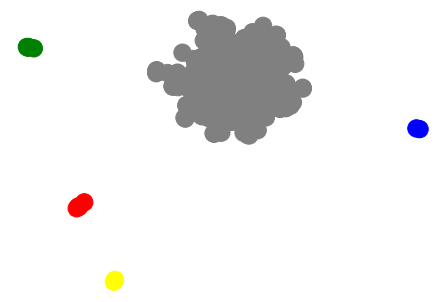

In [32]:
#draw 5 communities
communities = np.unique(list(partition.values()))
#np.random.seed(0)
communities_to_draw = np.random.choice(communities,5)
nodes = np.array([(node,cluster) for node, cluster in partition.items() for draw in communities_to_draw if cluster == draw])
clusters = nodes[:,1]
comparison_values = np.unique(clusters)
color_map = []
for cluster in clusters:
    if cluster == comparison_values[0]:
        color_map.append('blue')
    if cluster == comparison_values[1]:
        color_map.append('green')  
    if cluster == comparison_values[2]:
        color_map.append('red')
    if cluster == comparison_values[3]:
        color_map.append('yellow')
    if cluster == comparison_values[4]:
        color_map.append('gray')
G2 = G1.subgraph(nodes[:,0])
color_map_ordered = ([color_map[np.where(nodes[:,0] == node)[0].squeeze()]
                      for node in G2.nodes])
nx.draw(G2,node_color=color_map_ordered)

Se puede apreciar que, a pesar de no tener una modularidad muy alta, la partición hace un buen trabajo a la hora de separar comunidades. Las comunidades (representadas por colores) tienen una clara separación entre sí y se notan coherentes al concepto de clusters.